In [1]:
import content as content
!pip install catboost

  Using cached catboost-1.0.6-cp38-none-macosx_10_6_universal2.whl (21.9 MB)
  Using cached graphviz-0.20-py3-none-any.whl (46 kB)
  Using cached scipy-1.8.1-cp38-cp38-macosx_12_0_arm64.whl (28.6 MB)
  Using cached plotly-5.9.0-py2.py3-none-any.whl (15.2 MB)
  Using cached pandas-1.4.3-cp38-cp38-macosx_11_0_arm64.whl (10.3 MB)
  Using cached matplotlib-3.5.2-cp38-cp38-macosx_11_0_arm64.whl (7.2 MB)
  Using cached numpy-1.23.1-cp38-cp38-macosx_11_0_arm64.whl (13.3 MB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
  Using cached Pillow-9.2.0-cp38-cp38-macosx_11_0_arm64.whl (2.8 MB)
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-macosx_11_0_arm64.whl (63 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
You should consider upgrading via the '/Users/ishanranasinghe/PycharmProjects/FakeNewsFinal/venv/bin/python -m pip install --upgrade pip' command.


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost
import catboost
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import string

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishanranasinghe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv('/Users/ishanranasinghe/Desktop/Fake_News_Test_Master/Fake News Dataset.csv')

In [5]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [6]:
df.drop(['id'], axis=1, inplace=True)
df.head(5)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


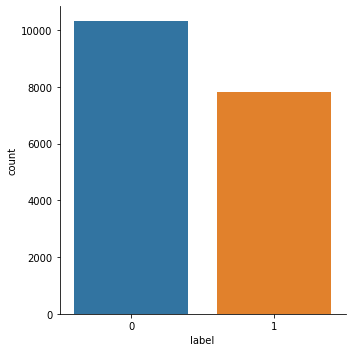

In [121]:
sns.catplot(x='label',data=df,kind='count')

In [8]:
df['content'] = df['author']+' '+df['title']+' '+df['text']
df.drop(['author','title','text'], axis=1, inplace=True)
df.head(10)

,label,content
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,Howard Portnoy Iranian woman jailed for fictio...
5,0,Daniel Nussbaum Jackie Mason: Hollywood Would ...
6,1,NaN
7,0,Alissa J. Rubin Benoît Hamon Wins French Socia...
8,0,NaN
9,0,Megan Twohey and Scott Shane A Back-Channel Pl...


In [9]:
df.shape

(20800, 2)

In [10]:
df.isnull().sum()

label         0
content    2663
dtype: int64

In [11]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [12]:
df.dropna(axis=0, inplace = True)
df.shape

(18137, 2)

In [13]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    return clean_words

In [14]:
df['content'].apply(process_text)

0        [Darrell, Lucus, House, Dem, Aide, Didn’t, Eve...
1        [Daniel, J, Flynn, FLYNN, Hillary, Clinton, Bi...
2        [Consortiumnewscom, Truth, Might, Get, Fired, ...
3        [Jessica, Purkiss, 15, Civilians, Killed, Sing...
4        [Howard, Portnoy, Iranian, woman, jailed, fict...
                               ...                        
20795    [Jerome, Hudson, Rapper, TI, Trump, ’Poster, C...
20796    [Benjamin, Hoffman, NFL, Playoffs, Schedule, M...
20797    [Michael, J, de, la, Merced, Rachel, Abrams, M...
20798    [Alex, Ansary, NATO, Russia, Hold, Parallel, E...
20799    [David, Swanson, Keeps, F35, Alive, David, Swa...
Name: content, Length: 18137, dtype: object

In [79]:
x_train, x_test, y_train, y_test = train_test_split(df['content'], df['label'],
                                                    test_size=0.2, random_state=123456)
vectorizer = CountVectorizer()
vec_train = vectorizer.fit_transform(x_train)
vec_test = vectorizer.transform(x_test)

In [108]:
vec_train.shape

(14509, 138597)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [45]:
model_RF = RandomForestClassifier()

In [81]:
model_RF.fit(vec_train, y_train)

RandomForestClassifier()

In [84]:
y_pred_RF = model_RF.predict(vec_test)

In [85]:
print("RF: ", accuracy_score(y_test,y_pred_RF)*100)

RF:  92.64057331863286


In [86]:
def evaluate(model, x_test, y_test):
  pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
  print("TN: {}   FP: {}\nFN: {}   TP: {}".format(tn, fp, fn, tp))
  print(classification_report(y_test, pred))
  print('Accuracy: %f' % accuracy)
  print('Precision: %f' % precision)
  print('Recall: %f' % recall)
  print('F1 score: %f' % f1)

In [88]:
evaluate(model_RF, vec_test, y_test)

TN: 2008   FP: 31
FN: 236   TP: 1353
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      2039
           1       0.98      0.85      0.91      1589

    accuracy                           0.93      3628
   macro avg       0.94      0.92      0.92      3628
weighted avg       0.93      0.93      0.93      3628

Accuracy: 0.926406
Precision: 0.977601
Recall: 0.851479
F1 score: 0.910192


In [89]:
print (f'Train Accuracy - : {model_RF.score(vec_train,y_train):.3f}')
print (f'Test Accuracy - : {model_RF.score(vec_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.926


In [91]:
model_xgboost = xgboost.XGBClassifier()

In [93]:
model_xgboost.fit(vec_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [94]:
model_xgboost.fit(vec_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [96]:
y_pred_xgboost = model_xgboost.predict(vec_test)

In [97]:
print("XGBM: ", accuracy_score(y_test, y_pred_xgboost)*100)

XGBM:  98.59426681367145


In [98]:
evaluate(model_xgboost, vec_test, y_test)

TN: 2011   FP: 28
FN: 23   TP: 1566
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2039
           1       0.98      0.99      0.98      1589

    accuracy                           0.99      3628
   macro avg       0.99      0.99      0.99      3628
weighted avg       0.99      0.99      0.99      3628

Accuracy: 0.985943
Precision: 0.982434
Recall: 0.985525
F1 score: 0.983977


In [99]:
print (f'Train Accuracy - : {model_xgboost.score(vec_train,y_train):.3f}')
print (f'Test Accuracy - : {model_xgboost.score(vec_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.986


<AxesSubplot:>

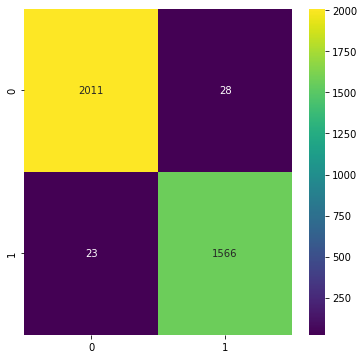

In [118]:
cm = confusion_matrix(list(y_test), y_pred_xgboost)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')

Observations
1589 Fake News have been Classified as Fake, while 2029 Real News have been classified as Real

In [100]:
model_catboost = catboost.CatBoostClassifier()

In [101]:
model_catboost.fit(vec_train, y_train)

Learning rate set to 0.032281
0:	learn: 0.6576715	total: 331ms	remaining: 5m 30s
1:	learn: 0.6275820	total: 707ms	remaining: 5m 52s
2:	learn: 0.5952338	total: 932ms	remaining: 5m 9s
3:	learn: 0.5656809	total: 1.14s	remaining: 4m 43s
4:	learn: 0.5340083	total: 1.36s	remaining: 4m 31s
5:	learn: 0.5080633	total: 1.55s	remaining: 4m 17s
6:	learn: 0.4801903	total: 1.77s	remaining: 4m 10s
7:	learn: 0.4548891	total: 2.01s	remaining: 4m 8s
8:	learn: 0.4317758	total: 2.23s	remaining: 4m 6s
9:	learn: 0.4148427	total: 2.46s	remaining: 4m 3s
10:	learn: 0.3957061	total: 2.67s	remaining: 3m 59s
11:	learn: 0.3785117	total: 2.87s	remaining: 3m 56s
12:	learn: 0.3657830	total: 3.09s	remaining: 3m 54s
13:	learn: 0.3496862	total: 3.35s	remaining: 3m 55s
14:	learn: 0.3325449	total: 3.6s	remaining: 3m 56s
15:	learn: 0.3219889	total: 3.94s	remaining: 4m 2s
16:	learn: 0.3098338	total: 4.2s	remaining: 4m 2s
17:	learn: 0.3008403	total: 4.43s	remaining: 4m 1s
18:	learn: 0.2908812	total: 4.65s	remaining: 4m
19:	l

In [102]:
y_pred_catboost = model_catboost.predict(vec_test)

In [103]:
print("CatBoost: ", accuracy_score(y_test, y_pred_catboost) * 100)

CatBoost:  98.59426681367145


In [104]:
evaluate(model_catboost, vec_test, y_test)

TN: 2014   FP: 25
FN: 26   TP: 1563
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2039
           1       0.98      0.98      0.98      1589

    accuracy                           0.99      3628
   macro avg       0.99      0.99      0.99      3628
weighted avg       0.99      0.99      0.99      3628

Accuracy: 0.985943
Precision: 0.984257
Recall: 0.983638
F1 score: 0.983947


In [105]:
print (f'Train Accuracy - : {model_catboost.score(vec_train,y_train):.3f}')
print (f'Test Accuracy - : {model_catboost.score(vec_test,y_test):.3f}')

Train Accuracy - : 0.999
Test Accuracy - : 0.986


In [106]:
import pickle

In [107]:
pickle.dump(model_xgboost, open('/Users/ishanranasinghe/Desktop/Fake_News_Test_Master/model_xgboost.pkl', 'wb'))

In [90]:
pickle.dump(vectorizer, open('/Users/ishanranasinghe/Desktop/Fake_News_Test_Master/vectorizer.pkl', 'wb'))